In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tqdm import tqdm

example of a number and it's representation:
5


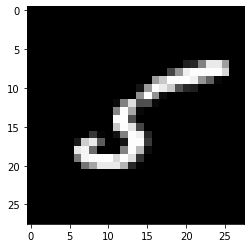

In [2]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
number = 11
plt.imshow(train_data[0][number], cmap='gray')
print('example of a number and it\'s representation:')
print(y_train[number])
plt.show()

In [3]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
def loss1(true, pred):
    val = 0.
    for i in range(len(true)):
        delta = pred[i, true[i]]
        val -= np.log(delta)
    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
predictions (Dense)          (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


2022-02-11 14:31:08.018966: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-11 14:31:08.019392: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [4]:
# untrained model
logits = model(x_train, training=True)
np.argmax(logits, 1)[0:100]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([3, 1, 4, 1, 1, 9, 9, 4, 9, 9, 3, 9, 9, 9, 5, 9, 9, 1, 5, 1, 9, 1,
       9, 1, 9, 4, 9, 1, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 1, 1, 1,
       2, 1, 9, 9, 9, 3, 1, 3, 1, 1, 9, 9, 9, 9, 1, 1, 9, 9, 9, 9, 3, 9,
       9, 9, 1, 9, 9, 9, 9, 1, 3, 3, 1, 1, 9, 9, 9, 9, 9, 1, 9, 1, 5, 9,
       1, 9, 9, 9, 4, 9, 9, 9, 9, 9, 3, 1])

In [5]:
# what we would like to get
test_data[1][0:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=uint8)

# ANSWERS

## 4) Model

### 4.1) How many optimization variables are we going to train using this model?

In [6]:
print('We are going to use (784+1) * 32 + (32+1) *32 + (32+1) *10 =',(784+1)*32+(32+1)*32+(32+1)*10,' optimization variables ')
print('We take the value \'x+1\' everytime in order to take into account the bias')

We are going to use (784+1) * 32 + (32+1) *32 + (32+1) *10 = 26506  optimization variables 
We take the value 'x+1' everytime in order to take into account the bias


## 5) Stochastic gradient descent

### 5.1)  and 5.2)

In [7]:
number = len(x_train)//8
step = 1/np.sqrt(number)
print(step)
losss = []

def update_weights(model, update, alpha):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] -alpha * update[i]
    model.set_weights(new_weights)

number_of_loop = 5
for inde in range(number_of_loop):
    for k in tqdm(range(number)):
        x_train_batch = x_train[k*8:k*8+8]
        y_train_batch = y_train[k*8:k*8+8]
        with tf.GradientTape() as tape:
                # Run the forward pass of the layer.
                # The operations that the layer applies
                # to its inputs are going to be recorded
                # on the GradientTape.
                logits = model(x_train_batch)  # Logits for this minibatch

                # Compute the loss value for this minibatch.
                loss_value = loss(y_train_batch, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grad = tape.gradient(loss_value, model.trainable_weights)

        def update_weights(model, update, alpha):
            new_weights = model.trainable_weights.copy()
            for i in range(len(new_weights)):
                new_weights[i] = new_weights[i] -alpha * update[i]
            model.set_weights(new_weights)

        update_weights(model,grad,step)

        ## Evaluate model
        samples_for_evaluation = np.random.randint(0, 10000, 1000)
        logits = model(x_train[samples_for_evaluation])
        losss.append(loss(y_train[samples_for_evaluation], logits).numpy())
    print('number of loop:',inde+1,'/',number_of_loop)



0.011547005383792516


100%|███████████████████████████████████████| 7500/7500 [07:20<00:00, 17.04it/s]


number of loop: 1 / 5


100%|███████████████████████████████████████| 7500/7500 [05:45<00:00, 21.73it/s]


number of loop: 2 / 5


100%|███████████████████████████████████████| 7500/7500 [05:54<00:00, 21.14it/s]


number of loop: 3 / 5


100%|███████████████████████████████████████| 7500/7500 [07:17<00:00, 17.15it/s]


number of loop: 4 / 5


100%|███████████████████████████████████████| 7500/7500 [06:00<00:00, 20.81it/s]

number of loop: 5 / 5


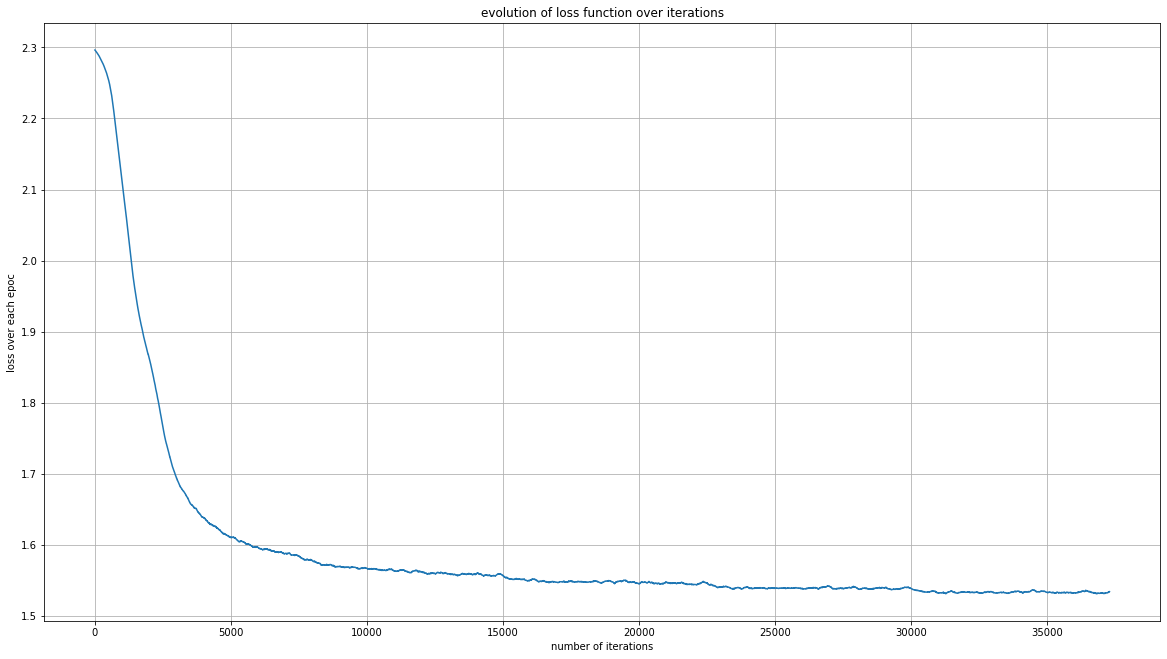

The average loss over 8 items is about: 1.5342064 at the end of the training.


In [8]:
wide = 200
loss_smmooth = [np.mean( np.asarray(losss[k:k+wide])) for k in range (len(losss)-wide)]
plt.figure(1,figsize=(20,11))
plt.plot(np.arange(len(loss_smmooth)),loss_smmooth)
plt.grid()
plt.title('evolution of loss function over iterations')
plt.xlabel('number of iterations')
plt.ylabel('loss over each epoc')
plt.show()
print('The average loss over 8 items is about:',np.mean(np.asarray(loss_smmooth[-4:-1])),'at the end of the training.')

## 6) Empirical risk minimization

### 6.2)

It allows a faster convergence towards the expected result.

## 7) Evaluation of the model

In [9]:
predi = []
data = (model.predict(test_data[0].reshape(-1,784).astype(float) / 255)*10).astype('int')
for i in tqdm(range(len(test_data[0].reshape(-1,784)))):
    L = data[i]
    predi.append(np.where( L == np.max(L))[0][0])

100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 115151.26it/s]


In [13]:
from collections import Counter
print(Counter(test_data[1]-predi))
rate = list(Counter(test_data[1]-predi).values())[0]/len(predi)
print('the good prediction rate is:',rate*100,'%')

Counter({0: 9289, -2: 116, 5: 82, -5: 75, 2: 68, 1: 55, 3: 50, -1: 46, 6: 38, -4: 38, 4: 33, -6: 33, -3: 24, 9: 14, -7: 13, 8: 12, 7: 11, -8: 3})
the good prediction rate is: 92.89 %


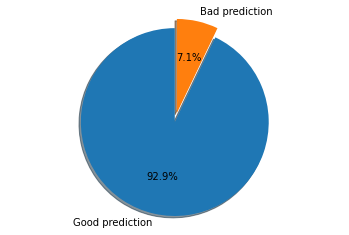

In [11]:
labels = 'Good prediction','Bad prediction'
sizes = [rate*100,(1-rate)*100]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,radius=1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()